In [1]:
################################################
## Gradient Descent
## Gradient Descent + Newton
## Gradient Descent and Newton with Random starts
##
## Code: B. Sercan BAYRAM
################################################

import matplotlib.pyplot as plt
import numpy as np

# Çözüm için verilen fonksiyonlar ve 
# türevlerinin tanımlanması
#
# f(x) = x**2 fonksiyonu
def f_one(x):
    return x**2

# f(x) = x**4 - 5x**2 - 3x fonksiyonu
def f_two(x):
    return (x**4 - 5*x**2 - 3*x)

# Yukarıda tanımlanan fonksiyonların
# türevlenmiş hallerinin tanımlanması
#
# f'(x) = 2x fonksiuonu (Türevli)
def f_one_derivative(x):
    return 2*x

# f'(x) = 4x**3 - 10x** -3  fonksiuonu (Türevli)
def f_two_derivative(x):
    return (4*x**3 - 10*x -3)
    
# Newton Yöntemi için 2. türev fonksiyonlrı eklendi
# 
# f''(x) = 2
def ff_one_derivative(x):
    return 2

# f''(x) = 12x**2 - 10 fonksiyonu
def ff_two_derivative(x):
    return (12*x**2 - 10)

# Gradient Descent algoritmasının fonksiyon olarak tanımlanması
def gradientDescent(x, step, repeat, derivativeFunc):
    # derivativeFunc: ilgili fonksiyonun türevi
    x0 = x       # Başlangıç değeri
    lr = step    # Adım büyüklüğü / learning rate
    n = repeat   # Tekrar sayısı
    x0list = []  # Optimizasyon değerlerinin tutulacağı dizi

    for i in range(n):
        x0 = x0 - lr*derivativeFunc(x0)
        x0list.append(x0)
    return x0list

# Gradient Descent ve Newton yöntemi
def gradientDescentNewton(x, step, repeat, derivativeFunc, twoDerivativeFunc):
    # derivativeFunc: ilgili fonksiyonun türevi
    x0 = x       # Başlangıç değeri
    lr = step    # Adım büyüklüğü / learning rate
    n = repeat   # Tekrar sayısı
    x0list = []  # Optimizasyon değerlerinin tutulacağı dizi

    for i in range(n):
        x0 = x0 - lr*derivativeFunc(x0)*(1/twoDerivativeFunc(x0))
        x0list.append(x0)
    return x0list

In [2]:
# Fonksiyonların, Gradient Descent algoritması ile
# çözümü ve sonuçların grafiksel olarak gösterimi

# f(x) = x**2 fonksiyonunun Gradient Descent 
# algoritması ile çözümü.
#
# x0 = -1 başlangıç noktası
# step = 0.01 adım büyüklüğü
# n = 200 tekrar ile çözüm
one_Func_Optimizasyon = gradientDescent(-1, 0.01, 100, f_one_derivative)
print("x**2 => Gradient Descent => GLOBAL MINUMUM: X: {} Y: {}".format(one_Func_Optimizasyon[-1], f_one(one_Func_Optimizasyon[-1])))

# f(x) = x**4 - 5x**2 - 3x fonksiyonunun Gradient Descent
# algoritması ile çözümü 
#
# x0 = -1 başlangıç noktası
# step = 0.01 adım büyüklüğü
# n = 100 tekrar ile çözüm
two_Func_Optimizasyon = gradientDescent(-1, 0.01, 100, f_two_derivative)
print("2x - 5**4 - 3x => Gradient Descent => YEREL MINUMUM: X: {} Y: {}".format(two_Func_Optimizasyon[-1], f_two(two_Func_Optimizasyon[-1])))

# x0 = +1 başlangıç noktası
# step = 0.01 adım büyüklüğü
# n = 100 tekrar ile çözüm
global_two_Func_Optimizasyon = gradientDescent(1, 0.01, 100, f_two_derivative)
print("x**4 - 5x**2 - 3x => Gradient Descent => GLOBAL MINUMUM: X: {} Y: {}".format(global_two_Func_Optimizasyon[-1], f_two(global_two_Func_Optimizasyon[-1])))

x**2 => Gradient Descent => GLOBAL MINUMUM: X: -0.13261955589475316 Y: 0.017587946605721556
2x - 5**4 - 3x => Gradient Descent => YEREL MINUMUM: X: -1.4017708661060373 Y: -1.7584212705424642
x**4 - 5x**2 - 3x => Gradient Descent => GLOBAL MINUMUM: X: 1.7139394361849303 Y: -11.20033470869566


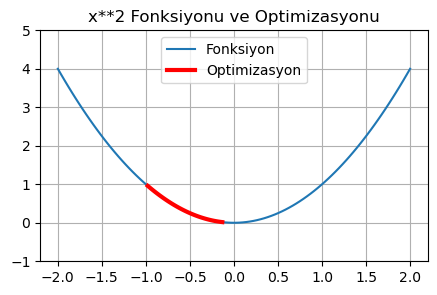

In [3]:
# Fonksiyon ve Optimizasyon sonuçlarının
# grafiksel olarak gösterimi

# f(x) = x**2 fonksiyonu için grafik çizimi
# x ekseni için -2 ve 2 aralığı
x_coordinate = np.linspace(-2, 2, 100)
y_coordinate = f_one(x_coordinate)

func_x_coordinate = one_Func_Optimizasyon
func_y_coordinate = f_one(np.array(func_x_coordinate))

plt.figure(figsize=(5,3))
plt.grid(True)
plt.ylim([-1, 5])
plt.title("x**2 Fonksiyonu ve Optimizasyonu")
plt.plot(x_coordinate, y_coordinate)
plt.plot(func_x_coordinate, func_y_coordinate, 'r', linewidth=3)
plt.legend(["Fonksiyon", "Optimizasyon"])
plt.show()


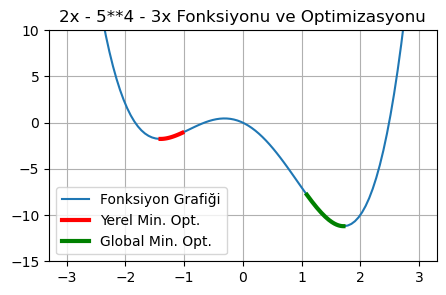

In [4]:
# Fonksiyon ve Optimizasyon sonuçlarının
# grafiksel olarak gösterimi

# f(x) = x**2 fonksiyonu için grafik çizimi
# x ekseni için -2 ve 2 aralığı
x_coordinate = np.linspace(-3, 3, 100)
y_coordinate = f_two(x_coordinate)

# x0 = -1 başlangıç yapılan optimizasyon
# YEREL MINIMUM
func_x_coordinate = two_Func_Optimizasyon
func_y_coordinate = f_two(np.array(func_x_coordinate))

# x0 = +1 başlangıç yapılan optimizasyon
# GLOBAL MINIMUM
global_func_x_coordinate = global_two_Func_Optimizasyon
global_func_y_coordinate = f_two(np.array(global_func_x_coordinate))


plt.figure(figsize=(5,3))
plt.grid(True)
plt.ylim([-15, 10])
plt.title("2x - 5**4 - 3x Fonksiyonu ve Optimizasyonu")

plt.plot(x_coordinate, y_coordinate)
plt.plot(func_x_coordinate, func_y_coordinate, 'r', linewidth=3)
plt.plot(global_func_x_coordinate, global_func_y_coordinate, 'g', linewidth=3)

plt.legend(["Fonksiyon Grafiği", "Yerel Min. Opt.", "Global Min. Opt."])
plt.show()

In [9]:
# Fonksiyonların, Gradient Descent + Newton algoritması ile
# çözümü ve sonuçların grafiksel olarak gösterimi

# f(x) = x**2 fonksiyonunun Gradient Descent + Newton
# algoritması ile çözümü.
#
# x0 = -1 başlangıç noktası
# step = 0.01 adım büyüklüğü
# n = 200 tekrar ile çözüm
one_Func_Optimizasyon = gradientDescentNewton(-1, 0.01, 100, f_one_derivative, ff_one_derivative)

print("x**2 => Gradient + Newton GLOBAL MINUMUM: X: {} Y: {}".format(one_Func_Optimizasyon[-1], f_one(one_Func_Optimizasyon[-1])))


# f(x) = 2x - 5**4 - 3x fonksiyonunun Gradient Descent + Newton
# algoritması ile çözümü 
#
# x0 = -1 başlangıç noktası
# step = 0.01 adım büyüklüğü
# n = 100 tekrar ile çözüm
two_Func_Optimizasyon = gradientDescentNewton(-1, 0.01, 100, f_two_derivative, ff_two_derivative)
print("2x - 5**4 - 3x => Gradient + Newton YEREL MINUMUM: X: {} Y: {}".format(two_Func_Optimizasyon[-1], f_two(two_Func_Optimizasyon[-1])))

# x0 = +1 başlangıç noktası
# step = 0.01 adım büyüklüğü
# n = 100 tekrar ile çözüm
global_two_Func_Optimizasyon = gradientDescentNewton(1, 0.01, 100, f_two_derivative, ff_two_derivative)
print("2x - 5**4 - 3x => Gradient + Newto GLOBAL MINUMUM: X: {} Y: {}".format(global_two_Func_Optimizasyon[-1], f_two(global_two_Func_Optimizasyon[-1])))

x**2 => Gradient + Newton GLOBAL MINUMUM: X: -0.3660323412732296 Y: 0.133979674857962
2x - 5**4 - 3x => Gradient + Newton YEREL MINUMUM: X: -1.3117908919250931 Y: -1.7074674285071287
2x - 5**4 - 3x => Gradient + Newto GLOBAL MINUMUM: X: 1.5682919805560103 Y: -10.953238908727439


In [11]:
################
### Gradient Descent + Newton with Random Restarts
### Algoritması
### randomScan(a1,a2, step, rp, funcOrigin, f_derivative, ff_derivative)
### a1 = 1. aralık
### a2 = 2. aralık
### step = learnig rate
### funcOrigin = original fonksiyon
### f_derivative = fonksiyonun 1. türevi
### ff_derivative = fonksiyonun 2. türevi
################
import random

def randomScan(a1,a2, step, rp, funcOrigin, f_derivative, ff_derivative):
    rep = 100
    
    x0 = (a2-a1) * random.random()
    x0temp = [x0, funcOrigin(x0)]
    for i in range(rep):
        optimizasyon = gradientDescentNewton(x0, step, rp, f_derivative, ff_derivative)
        if funcOrigin(optimizasyon[-1]) < x0temp[0]:
                x0temp = [optimizasyon[-1], funcOrigin(optimizasyon[-1])]
        x0 = (a2-a1) * random.random()
    return x0temp


sonuc = randomScan(1,5, 0.01, 1000, f_one, f_one_derivative, ff_one_derivative)
print("x**2 => Gradient + Newton random Optimizasyon: [x , f(x)] = {}".format(sonuc))

sonuc2 = randomScan(-2,2, 0.01, 1000, f_two, f_two_derivative, ff_two_derivative)
print("2x - 5**4 - 3x => Gradient + Newton RANDOM Optimizasyon [x , f(x)] = {}".format(sonuc2))

x**2 => Gradient + Newton random Optimizasyon: [x , f(x)] = [0.00016761642763670032, 2.8095266813689194e-08]
2x - 5**4 - 3x => Gradient + Newton RANDOM Optimizasyon [x , f(x)] = [1.71398149363085, -11.200334686362748]
